In [2]:
import os
import pandas as pd
import numpy as np

In [4]:
data_path = './data'

post_name = 'all_posts.pickle'
post_dir = os.path.join(data_path, post_name)
all_posts = pd.read_pickle(post_dir)
all_posts.head()

,created_utc,id,author,title,selftext,subreddit,link,score,upvote_ratio,author_flair_text,num_comments,removed_by_category,url,divisiveness
0,1588242127,gat3o9,TransGirl757,"If we get approved by 100k people in 1 month, ...",NaN,progressive,/r/progressive/comments/gat3o9/if_we_get_appro...,1,1.0,NaN,0,moderator,https://petitions.whitehouse.gov/petition/give...,1
1,1588222576,gapbez,shallah,Elizabeth Warren and Alexandria Ocasio-Cortez ...,NaN,progressive,/r/progressive/comments/gapbez/elizabeth_warre...,1,1.0,NaN,0,moderator,https://theweek.com/speedreads/911377/elizabet...,1
2,1588216466,ganw7m,shallah,"Gov Whitmer Announces ""Futures for Frontliners...",NaN,progressive,/r/progressive/comments/ganw7m/gov_whitmer_ann...,1,1.0,NaN,5,NaN,"https://www.michigan.gov/whitmer/0,9309,7-387-...",1
3,1588200464,gajmqr,thinkB4WeSpeak,Could pandemic rekindle labor movement?,NaN,progressive,/r/progressive/comments/gajmqr/could_pandemic_...,1,1.0,NaN,2,NaN,https://finance-commerce.com/2020/04/could-pan...,1
4,1588197018,gaikq1,davyjoneses,Found on r/therightcantmeme. Should the govern...,NaN,progressive,/r/progressive/comments/gaikq1/found_on_rtheri...,1,1.0,NaN,1,moderator,https://np.reddit.com/r/TheRightCantMeme/comme...,1


In [6]:
comment_name = 'all_comments.pickle'
comments_path = './data'
comment_dir = os.path.join(data_path, comment_name)

if os.path.isfile(comment_dir):
    all_comments = pd.read_pickle(comment_dir)
else: 
    all_data_sources = [comments_path + i for i in os.listdir(comments_path)][1:]
    print(all_data_sources)

    dfs = []

    for name in all_data_sources[1:]:
        print(name)
        df = pd.read_pickle(name)
        print(df.subreddit.memory_usage(deep=True))
        df['subreddit'] = df.subreddit.astype('category')
        df = df[['author', 'body', 'created_utc', 'id', 'parent_id', 'link_id','score', 'subreddit', 'vulgarity', 'civility', 'namecalling', 'stereotype', 'demeaning', 'author_flair_text']]
        dfs.append(df)
        print(df.subreddit.memory_usage(deep=True))

    all_comments = pd.concat(dfs, axis=0)
    del df, dfs
    all_comments.to_pickle('../data/comments/all_comments.pickle')
print(len(all_comments))

39952586


In [2]:
fname = '/Users/yujia/research/stance/data/comments/with_labels/all_comments_no_liwc.pickle'
all_comments = pd.read_pickle(fname)
all_comments.head(10)

,created_utc,parent_id,link_id,id,author,body,subreddit,link,score,author_flair_text,vulgarity,personal_attacks,incivility,third_party_attacks,aspersion,comment_len,compound_sentiment
1,1612153203,t3_l9gngx,t3_l9gngx,glk8hec,runrain,Lol not even. Where I heard about it most was ...,AskThe_Donald,/r/AskThe_Donald/comments/l9gngx/doj_arrest_re...,1,:T: NOVICE,0.160585,0.001712,0.332831,0.004760,0.000276,96,-0.2357
2,1612152460,t3_l9t1ha,t3_l9t1ha,glk757a,SilverHerfer,To paraphrase one of the great conservatives o...,AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,3,:T: NOVICE,0.115829,0.002649,0.112667,0.003651,0.000283,26,0.8428
4,1612151108,t1_glit0la,t3_l9lonl,glk4jhg,Psychowitz,Like coding.,AskThe_Donald,/r/AskThe_Donald/comments/l9lonl/keystone_pipe...,0,:T: NOVICE,0.203247,0.002789,0.070185,0.003872,0.000680,2,0.3612
6,1612150714,t3_l9t1ha,t3_l9t1ha,glk3rkp,Salmankhan42069,"Wait, this is a meme?",AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,-1,:T: NOVICE,0.148250,0.004309,0.323237,0.005040,0.000420,5,0.0000
9,1612150618,t3_l9t1ha,t3_l9t1ha,glk3kvz,Pile_of_Walthers,Which one is more useful?,AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,2,:T: NOVICE,0.094569,0.003459,0.050714,0.003793,0.000210,5,0.4927
11,1612149928,t3_l9t1ha,t3_l9t1ha,glk27ga,heartless_13,"The new lady what's-her-face is horrible, she ...",AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,8,:T: NOVICE,0.592571,0.002211,0.936776,0.184635,0.000699,28,-0.5574
12,1612149549,t3_l9gngx,t3_l9gngx,glk1g71,Mr_Hyde_,If the lefts supporters can't see coup that's ...,AskThe_Donald,/r/AskThe_Donald/comments/l9gngx/doj_arrest_re...,3,:T: NOVICE,0.082533,0.001017,0.040850,0.003554,0.000127,26,0.4404
13,1612148971,t3_l9t1ha,t3_l9t1ha,glk0a5i,ImportantNothings,This meme doesn’t work because when people thi...,AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,0,:T: NOVICE,0.096316,0.002625,0.058954,0.003746,0.000221,16,0.0000
16,1612148254,t3_l9t1ha,t3_l9t1ha,gljytt3,revjoe918,She could never handle the pressure McEnany go...,AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,6,:T: NOVICE,0.196140,0.001492,0.375939,0.026969,0.000275,14,0.5556
18,1612146616,t3_l9gngx,t3_l9gngx,gljvb38,queenie104,Facebook is boring and outdated!! Twitter is ...,AskThe_Donald,/r/AskThe_Donald/comments/l9gngx/doj_arrest_re...,2,:T: NOVICE,0.141871,0.002778,0.986934,0.006760,0.999797,8,-0.7633


In [6]:
all_comments = all_comments[['created_utc', 'parent_id', 'link_id', 'id', 'author', 'body',
       'subreddit', 'link', 'score', 'author_flair_text', 'vulgarity',
       'personal_attacks', 'incivility', 'third_party_attacks', 'aspersion',
       'comment_len', 'compound_sentiment']]
all_comments.to_pickle('/Users/yujia/research/stance/data/comments/with_labels/all_comments_no_liwc.pickle')

In [3]:
all_posts = pd.read_pickle('/Users/yujia/research/stance/data/all_posts.pickle')
print(len(all_posts))
all_posts.head()

1046958


,created_utc,id,author,title,selftext,subreddit,link,score,upvote_ratio,author_flair_text,num_comments,removed_by_category,url,divisiveness
0,1588242127,gat3o9,TransGirl757,"If we get approved by 100k people in 1 month, ...",NaN,progressive,/r/progressive/comments/gat3o9/if_we_get_appro...,1,1.0,NaN,0,moderator,https://petitions.whitehouse.gov/petition/give...,1
1,1588222576,gapbez,shallah,Elizabeth Warren and Alexandria Ocasio-Cortez ...,NaN,progressive,/r/progressive/comments/gapbez/elizabeth_warre...,1,1.0,NaN,0,moderator,https://theweek.com/speedreads/911377/elizabet...,1
2,1588216466,ganw7m,shallah,"Gov Whitmer Announces ""Futures for Frontliners...",NaN,progressive,/r/progressive/comments/ganw7m/gov_whitmer_ann...,1,1.0,NaN,5,NaN,"https://www.michigan.gov/whitmer/0,9309,7-387-...",1
3,1588200464,gajmqr,thinkB4WeSpeak,Could pandemic rekindle labor movement?,NaN,progressive,/r/progressive/comments/gajmqr/could_pandemic_...,1,1.0,NaN,2,NaN,https://finance-commerce.com/2020/04/could-pan...,1
4,1588197018,gaikq1,davyjoneses,Found on r/therightcantmeme. Should the govern...,NaN,progressive,/r/progressive/comments/gaikq1/found_on_rtheri...,1,1.0,NaN,1,moderator,https://np.reddit.com/r/TheRightCantMeme/comme...,1


In [4]:
divisive_mapping = dict(zip(all_posts.id, all_posts.divisiveness))
all_comments['op_divisiveness'] = all_comments['link_id'].str[3:].apply(lambda x: divisive_mapping[x] if x in divisive_mapping else 0)
all_comments

,created_utc,parent_id,link_id,id,author,body,subreddit,link,score,author_flair_text,vulgarity,personal_attacks,incivility,third_party_attacks,aspersion,comment_len,compound_sentiment,op_divisiveness
1,1612153203,t3_l9gngx,t3_l9gngx,glk8hec,runrain,Lol not even. Where I heard about it most was ...,AskThe_Donald,/r/AskThe_Donald/comments/l9gngx/doj_arrest_re...,1,:T: NOVICE,0.160585,0.001712,0.332831,0.004760,0.000276,96,-0.2357,1
2,1612152460,t3_l9t1ha,t3_l9t1ha,glk757a,SilverHerfer,To paraphrase one of the great conservatives o...,AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,3,:T: NOVICE,0.115829,0.002649,0.112667,0.003651,0.000283,26,0.8428,1
4,1612151108,t1_glit0la,t3_l9lonl,glk4jhg,Psychowitz,Like coding.,AskThe_Donald,/r/AskThe_Donald/comments/l9lonl/keystone_pipe...,0,:T: NOVICE,0.203247,0.002789,0.070185,0.003872,0.000680,2,0.3612,1
6,1612150714,t3_l9t1ha,t3_l9t1ha,glk3rkp,Salmankhan42069,"Wait, this is a meme?",AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,-1,:T: NOVICE,0.148250,0.004309,0.323237,0.005040,0.000420,5,0.0000,1
9,1612150618,t3_l9t1ha,t3_l9t1ha,glk3kvz,Pile_of_Walthers,Which one is more useful?,AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,2,:T: NOVICE,0.094569,0.003459,0.050714,0.003793,0.000210,5,0.4927,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127588,1603994257,t1_gaidthx,t3_jkbmw0,gaiivoy,GogglesPisano,"I remember when Fox, MSNBC and CNN [all broadc...",hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,4,NaN,0.066037,0.001627,0.016209,0.005488,0.000130,44,-0.2023,1
2127589,1603993347,t3_jkbmw0,t3_jkbmw0,gaigl2w,etzel1200,"That’s on Comey, not the NYT.",hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,2,NaN,0.256163,0.002296,0.130545,0.004628,0.000172,6,0.0000,1
2127590,1603992287,t3_jkbmw0,t3_jkbmw0,gaidthx,paywallpiker,People neglect that the media played a huge pa...,hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,4,NaN,0.104737,0.002317,0.037370,0.004813,0.029973,63,0.8020,1
2127591,1603885499,t3_jj3nmi,t3_jj3nmi,gaddjx4,GogglesPisano,"The Dakotas are getting slammed, especially co...",hillaryclinton,/r/hillaryclinton/comments/jj3nmi/oc_states_in...,1,NaN,0.209203,0.002534,0.611730,0.837685,0.000281,29,0.0000,1


In [13]:
labels = np.load('all_labels.npy')
all_comments['stereotyppe_new'] =  labels
# all_comments
all_comments.to_pickle('../data/comments/all_comments.pickle')

In [7]:
all_comments = all_comments[all_comments.author != 'AutoModerator']
all_comments

,created_utc,parent_id,link_id,id,author,body,subreddit,link,score,author_flair_text,vulgarity,personal_attacks,incivility,third_party_attacks,aspersion,comment_len,compound_sentiment
1,1612153203,t3_l9gngx,t3_l9gngx,glk8hec,runrain,Lol not even. Where I heard about it most was ...,AskThe_Donald,/r/AskThe_Donald/comments/l9gngx/doj_arrest_re...,1,:T: NOVICE,0.160585,0.001712,0.332831,0.004760,0.000276,96,-0.2357
2,1612152460,t3_l9t1ha,t3_l9t1ha,glk757a,SilverHerfer,To paraphrase one of the great conservatives o...,AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,3,:T: NOVICE,0.115829,0.002649,0.112667,0.003651,0.000283,26,0.8428
4,1612151108,t1_glit0la,t3_l9lonl,glk4jhg,Psychowitz,Like coding.,AskThe_Donald,/r/AskThe_Donald/comments/l9lonl/keystone_pipe...,0,:T: NOVICE,0.203247,0.002789,0.070185,0.003872,0.000680,2,0.3612
6,1612150714,t3_l9t1ha,t3_l9t1ha,glk3rkp,Salmankhan42069,"Wait, this is a meme?",AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,-1,:T: NOVICE,0.148250,0.004309,0.323237,0.005040,0.000420,5,0.0000
9,1612150618,t3_l9t1ha,t3_l9t1ha,glk3kvz,Pile_of_Walthers,Which one is more useful?,AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,2,:T: NOVICE,0.094569,0.003459,0.050714,0.003793,0.000210,5,0.4927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127588,1603994257,t1_gaidthx,t3_jkbmw0,gaiivoy,GogglesPisano,"I remember when Fox, MSNBC and CNN [all broadc...",hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,4,NaN,0.066037,0.001627,0.016209,0.005488,0.000130,44,-0.2023
2127589,1603993347,t3_jkbmw0,t3_jkbmw0,gaigl2w,etzel1200,"That’s on Comey, not the NYT.",hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,2,NaN,0.256163,0.002296,0.130545,0.004628,0.000172,6,0.0000
2127590,1603992287,t3_jkbmw0,t3_jkbmw0,gaidthx,paywallpiker,People neglect that the media played a huge pa...,hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,4,NaN,0.104737,0.002317,0.037370,0.004813,0.029973,63,0.8020
2127591,1603885499,t3_jj3nmi,t3_jj3nmi,gaddjx4,GogglesPisano,"The Dakotas are getting slammed, especially co...",hillaryclinton,/r/hillaryclinton/comments/jj3nmi/oc_states_in...,1,NaN,0.209203,0.002534,0.611730,0.837685,0.000281,29,0.0000


In [9]:
list(all_comments[all_comments.personal_attacks > 0.9].sample(10).body)

['There is no bias in the media you stupid conspiracy theorists! /s\n\n🙄',
 'You do realize that you’re on a libertarian subreddit, right? Where we believe in freedom of movement and that no individual illegal.\n\nYour fucking tag is a “Minarchist” and you don’t believe people have to right to move about freely? Give me a break. You’re an embarrassment to true supporters of minarchism.',
 "Go ahead and link that fucking article all you want. Go ahead take the drug, one fewer idiot we'll need to worry about when it doesn't work or causes heart issues. I gave you my fucking argument, sorry but it's not based on political bias. The only thing that's troubling is your lack of reasoning and intelligence. Oh look, there you go again wasting my time. Bye!",
 'He didn\'t use any insults. "Are you insane" is a common English phrase when you think someone\'s opinion is outlandish. It\'s not an insult and he didn\'t use any pejoratives.\n\nTry responding to his point rather than deflecting to mad

In [4]:
all_comments.corr().columns

Index(['level_0', 'index', 'created_utc', 'score', 'vulgarity', 'civility',
       'namecalling', 'stereotype', 'demeaning', 'aggregate', 'depth',
       'stereotyppe_new'],
      dtype='object')

In [12]:
all_comments['aggregate'] = all_comments['vulgarity']+all_comments['personal_attacks']+all_comments['stereotype']+all_comments['third_party_attacks']+all_comments['aspersion']
all_comments['aggregate'] = (all_comments['aggregate'] - np.min(all_comments['aggregate'])) / (np.max(all_comments['aggregate']) - np.min(all_comments['aggregate']))
all_comments

,created_utc,parent_id,link_id,id,author,body,subreddit,link,score,author_flair_text,vulgarity,personal_attacks,incivility,third_party_attacks,aspersion,comment_len,compound_sentiment,stereotype,aggregate
1,1612153203,t3_l9gngx,t3_l9gngx,glk8hec,runrain,Lol not even. Where I heard about it most was ...,AskThe_Donald,/r/AskThe_Donald/comments/l9gngx/doj_arrest_re...,1,:T: NOVICE,0.160585,0.001712,0.332831,0.004760,0.000276,96,-0.2357,0.234234,0.064974
2,1612152460,t3_l9t1ha,t3_l9t1ha,glk757a,SilverHerfer,To paraphrase one of the great conservatives o...,AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,3,:T: NOVICE,0.115829,0.002649,0.112667,0.003651,0.000283,26,0.8428,0.536770,0.125015
4,1612151108,t1_glit0la,t3_l9lonl,glk4jhg,Psychowitz,Like coding.,AskThe_Donald,/r/AskThe_Donald/comments/l9lonl/keystone_pipe...,0,:T: NOVICE,0.203247,0.002789,0.070185,0.003872,0.000680,2,0.3612,0.288935,0.087804
6,1612150714,t3_l9t1ha,t3_l9t1ha,glk3rkp,Salmankhan42069,"Wait, this is a meme?",AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,-1,:T: NOVICE,0.148250,0.004309,0.323237,0.005040,0.000420,5,0.0000,0.249884,0.066450
9,1612150618,t3_l9t1ha,t3_l9t1ha,glk3kvz,Pile_of_Walthers,Which one is more useful?,AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,2,:T: NOVICE,0.094569,0.003459,0.050714,0.003793,0.000210,5,0.4927,0.308906,0.067157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127588,1603994257,t1_gaidthx,t3_jkbmw0,gaiivoy,GogglesPisano,"I remember when Fox, MSNBC and CNN [all broadc...",hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,4,NaN,0.066037,0.001627,0.016209,0.005488,0.000130,44,-0.2023,0.238228,0.043984
2127589,1603993347,t3_jkbmw0,t3_jkbmw0,gaigl2w,etzel1200,"That’s on Comey, not the NYT.",hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,2,NaN,0.256163,0.002296,0.130545,0.004628,0.000172,6,0.0000,0.261439,0.093671
2127590,1603992287,t3_jkbmw0,t3_jkbmw0,gaidthx,paywallpiker,People neglect that the media played a huge pa...,hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,4,NaN,0.104737,0.002317,0.037370,0.004813,0.029973,63,0.8020,0.320039,0.079030
2127591,1603885499,t3_jj3nmi,t3_jj3nmi,gaddjx4,GogglesPisano,"The Dakotas are getting slammed, especially co...",hillaryclinton,/r/hillaryclinton/comments/jj3nmi/oc_states_in...,1,NaN,0.209203,0.002534,0.611730,0.837685,0.000281,29,0.0000,0.232618,0.270247


In [107]:
subreddit_groups = all_comments.groupby('subreddit')
# subreddit_count = dict(subreddit_groups.count()['author'])

In [57]:
threshold = np.quantile(all_comments['aggregate'].values)


0.5096961259841919

In [74]:
uncivil_comments = all_comments[all_comments['aggregate'] > 0.5]
uncivil_comments

,created_utc,parent_id,link_id,id,author,body,subreddit,link,score,author_flair_text,...,personal_attacks,incivility,third_party_attacks,aspersion,comment_len,compound_sentiment,stereotype,aggregate,user_activity_level,user_toxicity_level
38,1612127091,t1_glhsgh4,t3_l8lub6,gliq9gd,thxpk,&gt; While the rules regarding standing **do n...,AskThe_Donald,/r/AskThe_Donald/comments/l8lub6/new_york_judg...,1,:T: PROFICIENT,...,0.994875,0.993740,0.977948,0.000120,39,0.6124,0.384394,0.528759,579,50.0
352,1611933696,t3_l7h78y,t3_l7h78y,gl8uhbr,powowspells,It Is also happening with Cryptocurrencies. C...,AskThe_Donald,/r/AskThe_Donald/comments/l7h78y/dave_portnoy_...,1,NaN,...,0.001677,0.994987,0.973129,0.999398,59,-0.9403,0.232135,0.527006,1,1.0
398,1611908505,t3_l7kw4k,t3_l7kw4k,gl7nkzx,cockpugwash1,What a terrible turn of events. This virtue si...,AskThe_Donald,/r/AskThe_Donald/comments/l7kw4k/beto_orourke_...,1,:T: NOVICE,...,0.010535,0.991273,0.874915,0.999765,44,-0.0644,0.180205,0.525569,14,3.0
423,1611893895,t3_l1f597,t3_l1f597,gl6yqqs,Johnnythrash001,Haha you gullible idiots. Fell for the koolaid...,AskThe_Donald,/r/AskThe_Donald/comments/l1f597/rsb_president...,1,NaN,...,0.994932,0.993873,0.979271,0.000220,22,0.0000,0.211667,0.553608,30,7.0
582,1611813510,t3_l6mfmn,t3_l6mfmn,gl20z6d,peglegpowderskier,Just what this fucking pandemic lockdown neede...,AskThe_Donald,/r/AskThe_Donald/comments/l6mfmn/thanks_dement...,1,:T: NOVICE,...,0.993272,0.993692,0.865569,0.076339,14,-0.5423,0.433662,0.671888,91,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127208,1603916067,t1_gaew1ej,t3_jjmbfo,gaf17j3,SteakAndEggs2k,"You know, condescending shitlibs like you are ...",Political_Revolution,/r/Political_Revolution/comments/jjmbfo/6_days...,1,NaN,...,0.993540,0.992808,0.781162,0.010381,21,0.9371,0.285760,0.591979,177,19.0
2127211,1603913529,t1_gaeve06,t3_jjmbfo,gaevu0j,King_Of_The_Cold,No a deep red state like fucking McConnell ken...,Political_Revolution,/r/Political_Revolution/comments/jjmbfo/6_days...,1,NaN,...,0.993857,0.993649,0.006966,0.999770,65,-0.8375,0.384456,0.699970,77,12.0
2127382,1603805693,t1_ga9ljpm,t3_jiu97t,ga9r2k9,is_there_pie,"Yeah, when dark money and hyperparistans spear...",Political_Revolution,/r/Political_Revolution/comments/jiu97t/la_jef...,1,NaN,...,0.004190,0.992171,0.969286,0.979019,34,-0.5994,0.514569,0.666889,72,12.0
2127441,1603725302,t1_ga66nex,t3_jhw3ne,ga69289,mathiue777,That's exactly it. They think they are all bil...,Political_Revolution,/r/Political_Revolution/comments/jhw3ne/jeff_b...,1,NaN,...,0.971401,0.995553,0.937359,0.203727,33,0.6124,0.272044,0.668176,42,6.0


In [53]:
np.histogram(all_comments['third_party_attacks'].values)

(array([32070258,   477540,   255706,   191894,   167458,   163482,
          177575,   223055,   354061,  1486091]),
 array([0.00186049, 0.10041662, 0.19897275, 0.29752886, 0.396085  ,
        0.49464113, 0.5931972 , 0.6917534 , 0.7903095 , 0.88886565,
        0.98742175], dtype=float32))

In [52]:
# np.histogram(all_comments['third_party_attacks'].values)
np.quantile(all_comments['third_party_attacks'].values, 0.85)

0.02324476735666388

In [67]:
author_comment_count = dict(all_comments.groupby('author').count()['id'])
all_comments['user_activity_level'] = all_comments['author'].map(author_comment_count)
all_comments

,created_utc,parent_id,link_id,id,author,body,subreddit,link,score,author_flair_text,...,personal_attacks,incivility,third_party_attacks,aspersion,comment_len,compound_sentiment,stereotype,aggregate,user_activity_level,user_toxicity_level
1,1612153203,t3_l9gngx,t3_l9gngx,glk8hec,runrain,Lol not even. Where I heard about it most was ...,AskThe_Donald,/r/AskThe_Donald/comments/l9gngx/doj_arrest_re...,1,:T: NOVICE,...,0.001712,0.332831,0.004760,0.000276,96,-0.2357,0.234234,0.064974,46,13.0
2,1612152460,t3_l9t1ha,t3_l9t1ha,glk757a,SilverHerfer,To paraphrase one of the great conservatives o...,AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,3,:T: NOVICE,...,0.002649,0.112667,0.003651,0.000283,26,0.8428,0.536770,0.125015,665,197.0
4,1612151108,t1_glit0la,t3_l9lonl,glk4jhg,Psychowitz,Like coding.,AskThe_Donald,/r/AskThe_Donald/comments/l9lonl/keystone_pipe...,0,:T: NOVICE,...,0.002789,0.070185,0.003872,0.000680,2,0.3612,0.288935,0.087804,13,2.0
6,1612150714,t3_l9t1ha,t3_l9t1ha,glk3rkp,Salmankhan42069,"Wait, this is a meme?",AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,-1,:T: NOVICE,...,0.004309,0.323237,0.005040,0.000420,5,0.0000,0.249884,0.066450,7,1.0
9,1612150618,t3_l9t1ha,t3_l9t1ha,glk3kvz,Pile_of_Walthers,Which one is more useful?,AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,2,:T: NOVICE,...,0.003459,0.050714,0.003793,0.000210,5,0.4927,0.308906,0.067157,161,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127588,1603994257,t1_gaidthx,t3_jkbmw0,gaiivoy,GogglesPisano,"I remember when Fox, MSNBC and CNN [all broadc...",hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,4,NaN,...,0.001627,0.016209,0.005488,0.000130,44,-0.2023,0.238228,0.043984,401,99.0
2127589,1603993347,t3_jkbmw0,t3_jkbmw0,gaigl2w,etzel1200,"That’s on Comey, not the NYT.",hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,2,NaN,...,0.002296,0.130545,0.004628,0.000172,6,0.0000,0.261439,0.093671,444,47.0
2127590,1603992287,t3_jkbmw0,t3_jkbmw0,gaidthx,paywallpiker,People neglect that the media played a huge pa...,hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,4,NaN,...,0.002317,0.037370,0.004813,0.029973,63,0.8020,0.320039,0.079030,21,4.0
2127591,1603885499,t3_jj3nmi,t3_jj3nmi,gaddjx4,GogglesPisano,"The Dakotas are getting slammed, especially co...",hillaryclinton,/r/hillaryclinton/comments/jj3nmi/oc_states_in...,1,NaN,...,0.002534,0.611730,0.837685,0.000281,29,0.0000,0.232618,0.270247,401,99.0


In [75]:
author_uncivil_comment_count = dict(uncivil_comments.groupby('author').count()['id'])
all_comments['user_toxicity_level'] = all_comments['author'].map(author_uncivil_comment_count)
all_comments.user_toxicity_level.value_counts()

1.0      4450407
2.0      2858708
3.0      2130762
4.0      1659905
5.0      1277484
          ...   
191.0        835
185.0        817
364.0        777
198.0        776
165.0        732
Name: user_toxicity_level, Length: 206, dtype: int64

In [69]:
all_comments[all_comments.author == 'Bywater']

,created_utc,parent_id,link_id,id,author,body,subreddit,link,score,author_flair_text,...,personal_attacks,incivility,third_party_attacks,aspersion,comment_len,compound_sentiment,stereotype,aggregate,user_activity_level,user_toxicity_level
3272500,1610643650,t1_gj8soeh,t3_kx5eyc,gj8twjt,Bywater,"Agree.\r\nSincerely,\r\nAnother vet.",politics,/r/politics/comments/kx5eyc/upset_by_veterans_...,37,NaN,...,0.001827,0.017729,0.004002,0.000153,4,0.6808,0.204099,0.038842,6764,869.0
3019813,1596758146,t1_g0m8idu,t3_i51q1a,g0mduf0,Bywater,"If you can't draw the correlation on your own,...",Libertarian,/r/Libertarian/comments/i51q1a/judge_rules_vot...,1,Meat Popsicle,...,0.011480,0.015596,0.004736,0.000255,25,0.6705,0.202953,0.049704,6764,869.0
3019818,1596758102,t1_g0m7yud,t3_i51xt3,g0mdrsl,Bywater,"I was going to do Pan-Anarchist at one point, ...",Libertarian,/r/Libertarian/comments/i51xt3/out_of_interest...,1,Meat Popsicle,...,0.002520,0.121753,0.006244,0.000269,21,-0.5927,0.266183,0.077816,6764,869.0
3019941,1596756522,t1_g0m8qeb,t3_i2gluv,g0mb1bu,Bywater,Have you considered how many current libertari...,Libertarian,/r/Libertarian/comments/i2gluv/update_from_tex...,1,Meat Popsicle,...,0.005171,0.041520,0.002967,0.000139,65,0.3690,0.515700,0.110608,6764,869.0
3020008,1596755746,t3_i5169w,t3_i5169w,g0m9o9b,Bywater,Historically I guess it would have been mostl...,Libertarian,/r/Libertarian/comments/i5169w/libertarian_rol...,1,Meat Popsicle,...,0.002798,0.268107,0.004475,0.998488,143,-0.8102,0.354816,0.418412,6764,869.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4485062,1590880997,t1_fsd68lg,t3_gtipns,fsd9fbk,Bywater,You blowing smoke up your ass if you think the...,Libertarian,/r/Libertarian/comments/gtipns/make_life_decen...,1,Dissident,...,0.070079,0.979540,0.009250,0.001737,139,-0.6006,0.211589,0.132337,6764,869.0
4485963,1590870769,t1_fsbzcra,t3_gtipns,fscldj9,Bywater,Our standard of living is very high compared t...,Libertarian,/r/Libertarian/comments/gtipns/make_life_decen...,1,Dissident,...,0.002749,0.036536,0.007333,0.000412,168,-0.9187,0.277769,0.061264,6764,869.0
4485999,1590870351,t1_fsbxflq,t3_gtipns,fsck6rz,Bywater,"I think he was referring to reality, so no, ob...",Libertarian,/r/Libertarian/comments/gtipns/make_life_decen...,1,Dissident,...,0.001976,0.023576,0.003747,0.000215,12,-0.0762,0.297357,0.075781,6764,869.0
4486004,1590870293,t1_fsc0z53,t3_gtipns,fsck16k,Bywater,They kinda should be. They help keep everyone...,Libertarian,/r/Libertarian/comments/gtipns/make_life_decen...,1,Dissident,...,0.001643,0.966544,0.005054,0.000129,30,-0.2960,0.231579,0.168267,6764,869.0


In [76]:
# sorted(uncivil_comment_count, key=uncivil_comment_count.get, reverse=True)
{key: rank for rank, key in enumerate(sorted(author_uncivil_comment_count, key=author_uncivil_comment_count.get, reverse=True), 1)}

{'Selethorme': 1,
 'AlternativeSuccotash': 2,
 'Havetologintovote': 3,
 'Raunchy_Potato': 4,
 'Earthly_Knight': 5,
 '3720-To-One': 6,
 'jim351': 7,
 'GreyInkling': 8,
 'sunny_in_MN': 9,
 'th_brown_bag': 10,
 'BrighamYoung': 11,
 'brewbr0': 12,
 'Bywater': 13,
 'Rightquercusalba': 14,
 'GrandpaHardcore': 15,
 'Libertarian4All': 16,
 'MeatsimN64': 17,
 'cooneyes': 18,
 'carnagebestvillain': 19,
 'Sean951': 20,
 'Shaman_Bond': 21,
 'Vladimus44': 22,
 'ComradeBerns2ndGulag': 23,
 'HohlraumHe3': 24,
 'TheBirminghamBear': 25,
 'ChristopherPoontang': 26,
 'yasmin1334': 27,
 'NemosGhost': 28,
 'HarryBergeron927': 29,
 'sacrastic_monitor': 30,
 'The_LSD_Fairy': 31,
 'Bruce_G': 32,
 'Twerck': 33,
 'Enjolras55': 34,
 'moak0': 35,
 '5th_Law_of_Robotics': 36,
 'HorseWhisperer32': 37,
 'TFU_Merk': 38,
 'Carbonatite': 39,
 'spoobles': 40,
 'DeliciouslyCynical': 41,
 'IPredictAReddit': 42,
 'AIDS-Sundae': 43,
 'degeneracypromoter': 44,
 'dextersgold': 45,
 'goddamnzilla': 46,
 'CarsomyrPlusSix': 47,
 

In [77]:
def get_quantile_thresholds(array, proportions):
    return [np.quantile(array, i) for i in proportions]

get_quantile_thresholds(list(author_uncivil_comment_count.values()), [0, 0.5, 0.9, 0.99, 1])

[1, 1.0, 6.0, 30.0, 1037]

In [26]:
from matplotlib import pyplot as plt 
import numpy as np  
from matplotlib.pyplot import figure

# a = np.array(list(author_comment_count.values()))
# print(a) 
# plt.hist(a, bins = [0, 2, 5, 50, 100]) 
# plt.title("histogram") 
# plt.show()
# print(np.mean(a), max(a), min(a))
figure(figsize=(20, 18), dpi=80)
results = {}
table = []
level_distribution = []

# 'namecalling', 'demeaning', 'stereotype', 'aggregate'
for i in ['aggregate']:
    print(i)
    uncivil_comments = all_comments[all_comments[i] > 0.5]
    print(len(uncivil_comments), len(all_comments))
    uncivil_comment_count = dict(uncivil_comments.groupby('author').count()['id'])
    user_count = list(uncivil_comment_count.values())
    bins = get_quantile_thresholds(user_count, [0, 0.9, 0.99, 0.999, 1])
    out = pd.cut(pd.Series(user_count), bins=bins, include_lowest=False)
    print(out.value_counts(sort=False) )
    values = (out.value_counts(sort=False) / len(uncivil_comment_count.values()))
    print(values)
    level_distribution.append(values.values)
    uncivil_comments['user_{}_level'.format(i)] = uncivil_comments['author'].map(uncivil_comment_count)
    out = pd.cut(uncivil_comments['user_{}_level'.format(i)], bins=[0, 10, 20, 50, 200, max(uncivil_comments['user_{}_level'.format(i)])], include_lowest=True)
    print(out.value_counts(sort=False) )
    values = (out.value_counts(sort=False) / len(uncivil_comments))
    results[i] = values
    print(values)
    print(sum(values))
    table.append(list(values))
print(table)
print(level_distribution)
# import seaborn as sns
# sns.set_theme()
# ax = values.plot.bar(rot=0, color="b", figsize=(6,4))
# # ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
# ax.set_xticklabels(['1', '2-10', '10-50', '50-100', '100+'])
# ax.set_xlabel("Incivility level of a user")
# ax.set_ylabel("Percentage of contributed uncivil comments")
# # ax.set_xticklabels(['a', 'b', 'c', 'd', 'e'])
# plt.show()


aggregate
673770 35567120
(1.0, 6.0]        71264
(6.0, 30.0]       17374
(30.0, 97.0]       1835
(97.0, 1037.0]      212
dtype: int64
(1.0, 6.0]        0.334648
(6.0, 30.0]       0.081586
(30.0, 97.0]      0.008617
(97.0, 1037.0]    0.000996
dtype: float64
(-0.001, 10.0]     409157
(10.0, 20.0]        94050
(20.0, 50.0]        93125
(50.0, 200.0]       63176
(200.0, 1037.0]     14262
Name: user_aggregate_level, dtype: int64
(-0.001, 10.0]     0.607265
(10.0, 20.0]       0.139588
(20.0, 50.0]       0.138215
(50.0, 200.0]      0.093765
(200.0, 1037.0]    0.021167
Name: user_aggregate_level, dtype: float64
1.0
[[0.6072650904611366, 0.139587693129703, 0.13821482108137792, 0.09376493462160677, 0.021167460706175697]]
[array([0.33464818, 0.08158646, 0.00861697, 0.00099553])]


/var/folders/1d/mj1m58c50b790y544kd1bflm0000gn/T/ipykernel_6046/767309201.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uncivil_comments['user_{}_level'.format(i)] = uncivil_comments['author'].map(uncivil_comment_count)


<Figure size 1600x1440 with 0 Axes>

,a,b,c,d,e
0,0.236759,0.108108,0.176113,0.144061,0.300674
1,0.225947,0.105885,0.175023,0.144835,0.306740
2,0.235534,0.108888,0.173305,0.140456,0.314589
3,0.243010,0.107509,0.171396,0.137222,0.275987
4,0.236760,0.107625,0.178647,0.149913,0.327054


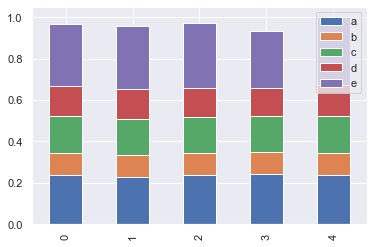

In [37]:
df = pd.DataFrame(table, columns=['a', 'b', 'c', 'd', 'e'])
axis = df[["a", "b", "c", "d", "e"]].plot(kind="bar", stacked=True)
fig = axis.get_figure()
df

(0, 5]            1989526
(5, 20]           3170285
(20, 100]         7373827
(100, 119105]    23033482
Name: user_activity_level, dtype: int64


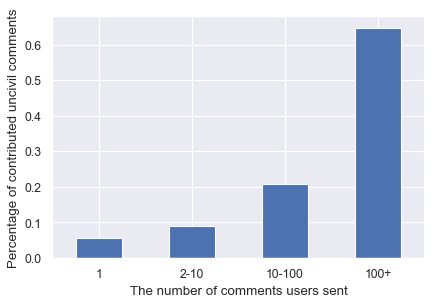

In [78]:
from matplotlib import pyplot as plt 
import numpy as np  
   
# a = np.array(list(author_comment_count.values()))
# print(a) 
# plt.hist(a, bins = [0, 2, 5, 50, 100]) 
# plt.title("histogram") 
# plt.show()
# print(np.mean(a), max(a), min(a))
figure(figsize=(20, 18), dpi=80)
out = pd.cut(all_comments.user_activity_level, bins=[0, 5, 20, 100, max(all_comments.user_activity_level)], include_lowest=False)
print(out.value_counts(sort=False) )
values = (out.value_counts(sort=False) / len(all_comments))
# print(values)
import seaborn as sns
sns.set_theme()
ax = values.plot.bar(rot=0, color="b", figsize=(6,4))
# ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
ax.set_xticklabels(['1', '2-10', '10-100', '100+'])
ax.set_xlabel("The number of comments users sent")
ax.set_ylabel("Percentage of contributed uncivil comments")
# ax.set_xticklabels(['a', 'b', 'c', 'd', 'e'])
plt.show()

In [12]:
figure(figsize=(20, 18), dpi=80)

print(values)
import seaborn as sns
sns.set_theme()
ax = values.plot.bar(rot=0, color="b", figsize=(6,4))
# ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
ax.set_xticklabels(['1', '2-10', '10-100', '100+'])
ax.set_xlabel("Toxicity level of a user")
ax.set_ylabel("Number of users")
# ax.set_xticklabels(['a', 'b', 'c', 'd', 'e'])
plt.show()

NameError: name 'figure' is not defined

(0, 1]         0.574153
(1, 20]        0.407444
(20, 100]      0.017459
(100, 1037]    0.000944
dtype: float64


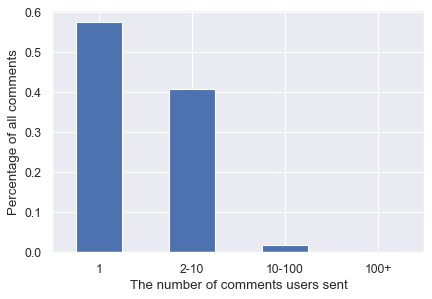

In [79]:
   
a = np.array(list(uncivil_comment_count.values()))
figure(figsize=(20, 18), dpi=80)
out = pd.cut(pd.Series(a), bins=[0, 1, 20, 100, max(a)], include_lowest=False)
values = (out.value_counts(sort=False) / len(a))
print(values)
import seaborn as sns
sns.set_theme()
ax = values.plot.bar(rot=0, color="b", figsize=(6,4))
# ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
ax.set_xticklabels(['1', '2-10', '10-100', '100+'])
ax.set_xlabel("The number of comments users sent")
ax.set_ylabel("Percentage of all comments")
# ax.set_xticklabels(['a', 'b', 'c', 'd', 'e'])
plt.show()

In [80]:
len(set(uncivil_comments.author))

212952

In [81]:
uncivil = {k: author_comment_count[k] for k in uncivil_comments.author}
frequency = (list(np.histogram(list(uncivil.values()), bins=19478)[0]))
values = (list(np.histogram(list(uncivil.values()), bins=19478)[1]))
# print(max(uncivil.values()))
sum(frequency)
frequency /= sum(frequency)
# pd.Se(np.cumsum(frequency))
df = pd.DataFrame([ [frequency[i], values[i]]for i in range(len(values)-1)], columns=['pdf','x'])
df['cdf'] = np.cumsum(frequency)
df
# df.plot(x = 'x', y = ['cdf'], grid = True)


,pdf,x,cdf
0,0.044334,1.000000,0.044334
1,0.035360,1.971352,0.079694
2,0.030472,2.942705,0.110166
3,0.027335,3.914057,0.137500
4,0.025217,4.885409,0.162717
...,...,...,...
19473,0.000000,18916.143239,0.999995
19474,0.000000,18917.114591,0.999995
19475,0.000000,18918.085943,0.999995
19476,0.000000,18919.057295,0.999995


In [104]:
len(set(uncivil_comments.author))*0.19

40460.88

In [106]:
1*len(uncivil_comments)

673770

In [100]:
np.cumsum(frequency)[70]

0.6670799053307788

In [105]:
np.cumsum(frequency)[99] - np.cumsum(frequency)[70]

0.07195518238851972

10 0.2621341898643826
50 0.591438446222623
0 1.000000000000033
[0.04433393440775386, 0.21780025545662873, 0.3293042563582404, 0.4085615537774101]


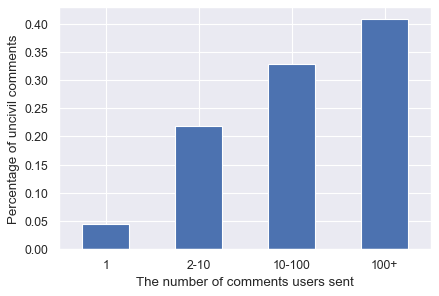

In [30]:

cumsum_freq = list(df.cdf)
values = [cumsum_freq[0]]
prev = [cumsum_freq[0]]
for i in [9, 49, -1]:
    print(i+1, np.cumsum(frequency)[i])
    values.append(cumsum_freq[i]-prev[-1])
    prev.append(cumsum_freq[i])
print(values)
figure(figsize=(20, 18), dpi=80)
values = pd.Series(values)
import seaborn as sns
sns.set_theme()
ax = values.plot.bar(rot=0, color="b", figsize=(6,4))
# ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
ax.set_xticklabels(['1', '2-10', '10-100', '100+'])
# ax.set_title("EFO")
ax.set_xlabel("The number of comments users sent")
ax.set_ylabel("Percentage of uncivil comments")
# plt.grid(b=True, which='major', color='#666666', linestyle='-')
# plt.minorticks_on()
# plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
# plt.style.use('seaborn-paper')
# ax.set_facecolor(color="#EAEAF2")
plt.show()

In [31]:
# np.cumsum(frequency)[5] - np.cumsum(frequency)[0]
for i in [0, 4, 19, 49, 9, -1]:
    print(i+1, np.cumsum(frequency)[i])

1 0.04433393440775386
5 0.16271741988804989
20 0.3945208309853864
50 0.591438446222623
10 0.2621341898643826
0 1.000000000000033


In [72]:
# print(list(df['cdf'])[70])
print(list(df['cdf'])[20])

0.6633527169032953


In [30]:
max(author_comment_count)

'zzzzzzzzzz55'

In [18]:
np.quantile(all_comments['aggregate'], 0.75)

0.42853681982198744

In [108]:
mean_values = subreddit_groups.mean()
mean_values

,created_utc,score,vulgarity,personal_attacks,incivility,third_party_attacks,aspersion,comment_len,compound_sentiment,stereotype,aggregate,user_activity_level,user_toxicity_level
subreddit,,,,,,,,,,,,,
AskThe_Donald,1.592758e+09,1.225668,0.163840,0.061556,0.288317,0.074425,0.065467,39.752846,-0.030237,0.323410,0.131894,376.154375,13.245999
Ask_Politics,1.594207e+09,1.566801,0.115004,0.049309,0.151530,0.031580,0.067308,72.359687,0.095941,0.323191,0.108050,465.767744,8.960899
BlueMidterm2018,1.604770e+09,1.781155,0.125265,0.009252,0.163989,0.030119,0.010334,20.574468,0.242099,0.336049,0.090483,1718.924012,6.828221
Conservative,1.598411e+09,3.940370,0.172240,0.071183,0.303230,0.071623,0.067017,34.116245,-0.023630,0.323976,0.135935,612.112946,20.075144
ConservativesOnly,1.600351e+09,3.972199,0.175358,0.031557,0.355951,0.121404,0.062698,27.246764,-0.053810,0.319290,0.136930,825.773398,33.242364
JoeBiden,1.598001e+09,1.223702,0.148949,0.029362,0.207984,0.050072,0.034569,30.169823,0.142632,0.326553,0.108775,731.327979,10.927757
Libertarian,1.595813e+09,1.415440,0.173457,0.115245,0.294839,0.063585,0.075396,41.376454,-0.018246,0.323300,0.146410,1247.546143,58.260894
NeutralPolitics,1.596312e+09,1.237235,0.102247,0.029053,0.070072,0.011881,0.034140,71.730633,0.109678,0.324551,0.088351,571.780462,6.267137
OurPresident,1.587522e+09,1.746014,0.184892,0.085321,0.308934,0.077507,0.063612,33.644820,0.044278,0.322315,0.142370,189.705619,7.728202


In [117]:
from datetime import datetime, timedelta
from scipy import stats

feb_2020_timestamp = 1580533200
feb_2021_timestamp = 1612155600

timestamps_datetime = [datetime.utcfromtimestamp(feb_2020_timestamp)]
for i in range(1, 53):
  timestamps_datetime.append( timestamps_datetime[i-1] + timedelta(days=14))

timestamps = [i.timestamp() for i in timestamps_datetime]
print(timestamps)

[1580551200.0, 1581760800.0, 1582970400.0, 1584176400.0, 1585386000.0, 1586595600.0, 1587805200.0, 1589014800.0, 1590224400.0, 1591434000.0, 1592643600.0, 1593853200.0, 1595062800.0, 1596272400.0, 1597482000.0, 1598691600.0, 1599901200.0, 1601110800.0, 1602320400.0, 1603530000.0, 1604743200.0, 1605952800.0, 1607162400.0, 1608372000.0, 1609581600.0, 1610791200.0, 1612000800.0, 1613210400.0, 1614420000.0, 1615629600.0, 1616835600.0, 1618045200.0, 1619254800.0, 1620464400.0, 1621674000.0, 1622883600.0, 1624093200.0, 1625302800.0, 1626512400.0, 1627722000.0, 1628931600.0, 1630141200.0, 1631350800.0, 1632560400.0, 1633770000.0, 1634979600.0, 1636189200.0, 1637402400.0, 1638612000.0, 1639821600.0, 1641031200.0, 1642240800.0, 1643450400.0]


In [127]:
left = ['BlueMidterm2018', 'politics', 'JoeBiden', 'Libertarian', 'OurPresident', 'PoliticalDiscussion', 'Political_Revolution', 'SandersForPresident', 'VoteBlue', 'hillaryclinton', 'politics', 'progressive']
right = ['AskThe_Donald', 'Conservative', 'ConservativesOnly', 'The_Mueller', 'donaldtrump']
neutral = ['Ask_Politics', 'NeutralPolitics', 'uspolitics']
categories = ['vulgarity', 'personal_attacks', 'third_party_attacks', 'stereotype', 'aspersion', 'aggregate']
dfs = [left, right, neutral]

In [118]:
res = []
for i in dfs:
    temp = all_comments[all_comments.subreddit.isin(i)]
    res.append(stats.binned_statistic(temp['created_utc'], [temp[i] for i in categories], 'mean', bins=timestamps)[0])

In [119]:
res

[array([[0.16556968, 0.16463257, 0.1619646 , 0.17206509, 0.17405339,
         0.17334028, 0.17360486, 0.17452786, 0.18063201, 0.17534216,
         0.17508446, 0.17581978, 0.17774106, 0.17475017, 0.17634972,
         0.17668645, 0.17459456, 0.17553082, 0.17348491, 0.16295203,
         0.16793602, 0.17393197, 0.17722008, 0.17962151, 0.17895798,
         0.17677139, 0.17555314,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan],
        [0.04886325, 0.04777287, 0.04911796, 0.0506556 , 0.05676278,
         0.05319147, 0.05677933, 0.05327818, 0.05279148, 0.04629631,
         0.04691632, 0.04711729, 0.04965282, 0.049013  , 0.04800445,
         0.05019301, 0.04761592, 0.03926056, 0.04328252, 0.04248583,


In [146]:
all_res = stats.binned_statistic(all_comments['created_utc'], all_comments['aggregate'], 'mean', bins=timestamps)[0]
all_res

array([0.28648678, 0.28379862, 0.28654636, 0.29947288, 0.30560722,
       0.30081626, 0.30106302, 0.30170705, 0.30994273, 0.29956969,
       0.30085892, 0.30224347, 0.30630702, 0.297938  , 0.29963316,
       0.30482372, 0.30261138, 0.29540822, 0.29114626, 0.27287584,
       0.29901547, 0.30399063, 0.30662747, 0.30832741, 0.30689826,
       0.30325506, 0.31051539,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan])

0
1
2
3
4


<ipython-input-147-ba80b3785b30>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(2, 3, index+1)
<ipython-input-147-ba80b3785b30>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(2, 3, index+1)
<ipython-input-147-ba80b3785b30>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new i

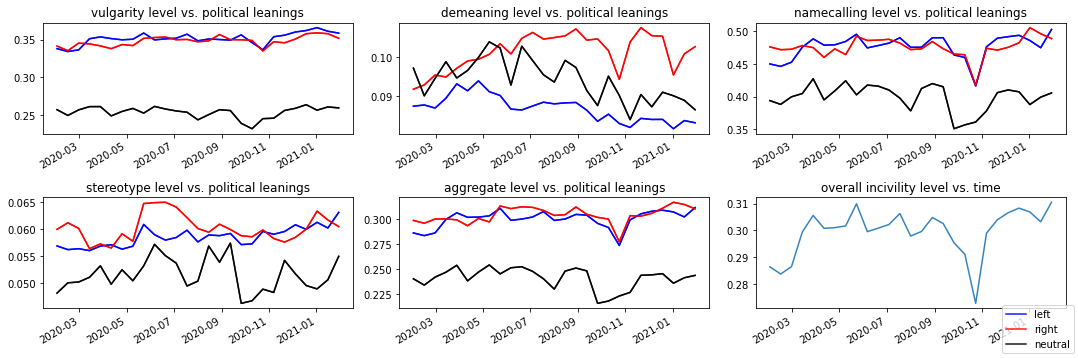

In [147]:
import matplotlib.pyplot as plt
graphs = []
fig = plt.figure()
for index, c in enumerate(categories):
    print(index)
    ax = fig.add_subplot(2, 3, index+1)
    time_data = pd.DataFrame(np.transpose(np.array(res)[:,index:index+1].squeeze()), columns=['left', 'right', 'neutral'], index=timestamps_datetime[:len(timestamps_datetime)-1])
    graphs.append(time_data.plot.line(stacked=False, alpha=0.9, figsize=(15,5), color={'left':'blue', 'right':'red', 'neutral':'black'}, title="{} level vs. political leanings".format(c), ax=ax, legend=False))

    ax = fig.add_subplot(2, 3, index+1)
    time_data = pd.DataFrame(np.transpose(np.array(res)[:,index:index+1].squeeze()), columns=['left', 'right', 'neutral'], index=timestamps_datetime[:len(timestamps_datetime)-1])
    graphs.append(time_data.plot.line(stacked=False, alpha=0.9, figsize=(15,5), color={'left':'blue', 'right':'red', 'neutral':'black'}, title="{} level vs. political leanings".format(c), ax=ax, legend=False))


ax = fig.add_subplot(2, 3, 6)
time_data = pd.DataFrame(np.transpose(all_res), index=timestamps_datetime[:len(timestamps_datetime)-1])
graphs.append(time_data.plot.line(stacked=False, alpha=0.9, figsize=(15,5), title="overall incivility level vs. time".format(c), ax=ax, legend=False))

fig.legend(graphs, labels=["left", "right", "neutral"],
           loc="lower right")
fig.tight_layout()


In [9]:
all_comments = all_comments.reset_index()
all_comments = all_comments.reset_index()
all_comments.head(10)

,level_0,index,author,body,created_utc,id,parent_id,link_id,score,subreddit,vulgarity,civility,namecalling,stereotype,demeaning,author_flair_text,aggregate
0,0,0,Koalemos78,Interesting take from someone who's education ...,1594611009,fxw8pc6,t3_hq7drs,t3_hq7drs,3,uspolitics,0.744458,0.152181,0.082147,0.026065,0.035793,NaN,0.271284
1,1,1,Thatsprettydank,Kinda lol they stopped researching out of bigotry,1594610955,fxw8mi5,t1_fxl5isk,t3_hovua5,1,uspolitics,0.595237,0.754733,0.239289,0.115970,0.038808,NaN,0.305323
2,2,3,Peripatetic_deviant,So you’re just guessing information? Even if t...,1594608113,fxw4axz,t1_fxw2l39,t3_hq16qw,1,uspolitics,0.275143,0.980211,0.584546,0.032369,0.105278,NaN,0.308034
3,3,4,buffalo_chum,They were out past curfew no? I bet there was ...,1594607019,fxw2l39,t1_fxvrvdq,t3_hq16qw,1,uspolitics,0.322457,0.078789,0.127013,0.081637,0.060492,NaN,0.171077
4,4,5,metaltimmy,Trump always likes these photo ops where he th...,1594606124,fxw153j,t3_hq4pq6,t3_hq4pq6,5,uspolitics,0.821457,0.990872,0.971880,0.184373,0.031645,NaN,0.649641
5,5,6,ouroboros-panacea,And he isn't even good at it. He's too transpa...,1594605259,fxvzr01,t3_hpzkft,t3_hpzkft,1,uspolitics,0.369666,0.971312,0.924112,0.029915,0.080515,NaN,0.445373
6,6,7,ouroboros-panacea,Of course two of the states with the highest C...,1594604882,fxvz4um,t3_hq0ipe,t3_hq0ipe,3,uspolitics,0.109969,0.105576,0.086737,0.047303,0.044219,NaN,0.068674
7,7,8,Mister_Met,He is a traitor. He’s just like Hitler,1594602179,fxvuq5q,t3_hq4pq6,t3_hq4pq6,7,uspolitics,0.421639,0.983711,0.943397,0.084075,0.058660,NaN,0.480331
8,8,9,autotldr,"This is the best tl;dr I could make, [original...",1594602084,fxvuki4,t3_hpof2a,t3_hpof2a,1,uspolitics,0.087793,0.158732,0.079129,0.010053,0.030873,NaN,0.041541
9,9,10,greenbabyshit,Some gave all.\n\nAll gave some. \n\nOne had b...,1594601990,fxvuf00,t3_hq4pq6,t3_hq4pq6,14,uspolitics,0.232875,0.898647,0.758360,0.258102,0.053185,NaN,0.411049


In [78]:
incivility = all_comments[(all_comments['aggregate'] > 0.75) | (all_comments['aggregate'] < 0.25)]
len(incivility)

15287313

In [80]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/yujia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [81]:
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter

## Trie with list of possible categories at the end
def build_category_trie(liwc, categories):
    trie = {}
    for category in categories:
        # revert to wildcard format from strings starting with ‘^’
        patterns = [s if s[0] != '^' else s[1:] + '*' for s in liwc.item().get(category)]
        for pattern in patterns:
            cursor = trie
            for char in pattern:
                if char == "*":
                    # Leaf found. Check if leaf exists and append.
                    if char in cursor:
                        cursor['*'].append(category)
                    else:
                        cursor['*'] = [category]
                    break
                if char not in cursor:
                    # Create new sub-trie
                    cursor[char] = {}
                cursor = cursor[char]
            # End of word. Use $ to denote word end.
            if '$' in cursor:
                cursor['$'].append(category)
            else:
                cursor['$'] = [category]
    return trie
def search_trie(trie, token, token_i=0):
    '''
    Search the given character-trie for paths that match the `token` string.
    '''
    if '*' in trie:
        # Wildstar ending
        return trie['*']
    if '$' in trie and token_i == len(token):
        # Met end of word.
        return trie['$']
    if token_i < len(token):
        char = token[token_i]
        if char in trie:
            return search_trie(trie[char], token, token_i + 1)
    return []
def search_trie_for_list(trie, l):
    full_answer = []
    for token in l:
        full_answer += search_trie(trie, token)
    return Counter(full_answer)
incivility['tokenized'] = incivility['body'].apply(lambda s : [i for i in word_tokenize(s) if i.isalpha()])
liwc = np.load('liwc.npy', allow_pickle=True)
categories = list(liwc.item().keys())
trie = build_category_trie(liwc, categories)
incivility['categories'] = incivility.tokenized.apply(lambda l : search_trie_for_list(trie, l))
# liwc_scores = incivility.categories.apply(pd.Series).fillna(0).astype(int)
# politics = pd.concat([politics, liwc_scores], axis=1)
# politics = politics.drop([‘tokenized’], axis=1)
incivility

In [5]:
parent_ids = dict(zip(all_comments.id, all_comments.parent_id.str[3:]))
parent_ids['fxuu216']

'fxuq6qg'

In [20]:
fname = 'depths_per_comments'
if os.path.isfile(fname):
    print("Has in file")
    depths = list(np.load(fname))
else:
    indices = list(all_comments[all_comments.link_id.str[3:] == all_comments.parent_id.str[3:]].index)
    depths = [0]*len(all_comments)
    for i in indices:
        depths[i] = 1
depths[:100]

Has in file


[1,
 5,
 6,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 3,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 4,
 2,
 1,
 1,
 3,
 2,
 4,
 2,
 4,
 3,
 2,
 1,
 2,
 10,
 1,
 9,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 8,
 7,
 6,
 1,
 5,
 4,
 1,
 3,
 1,
 1,
 1,
 4,
 3,
 3,
 2,
 1,
 14,
 2,
 1,
 13,
 2,
 3,
 1,
 12,
 1,
 11,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 5,
 1,
 1,
 1,
 1,
 4,
 3,
 4,
 2,
 1,
 1,
 2]

In [10]:
id_to_index = dict(zip(all_comments.id, all_comments.level_0))

In [24]:
def fill_depth(id, depth):
    index = id_to_index[id]
    # print("current search index is " + str(index))
    if depth[index] != 0:
        return
    
    if id in parent_ids.keys() and parent_ids[id] in id_to_index and depth[id_to_index[parent_ids[id]]] == 1:
            fill_depth(parent_ids[id] , depth)
    elif parent_ids[id] not in id_to_index:
        depth[index] = 1
        return
    depth[index] = depth[id_to_index[parent_ids[id]]]+1
for index, row in all_comments.loc[10000000:10000000].iterrows():
    fill_depth(row['id'], depths)
with open('depths_per_comments', 'wb') as f:
    np.save(f, depths)

all_comments['depth'] = depths
all_comments.to_pickle('../data/comments/all_comments.pickle')

In [62]:
np

0.4167423019411557

In [122]:
all_comments['personal_attacks_b'] = all_comments.personal_attacks > 0.5
all_comments['third_party_attacks_b'] = all_comments.third_party_attacks > 0.5
all_comments['vulgarity_b'] = all_comments.vulgarity > 0.5
all_comments['aspersion_b'] = all_comments.aspersion > 0.5
all_comments['stereotype_b'] = all_comments.stereotype > 0.5
quantile_75 = np.quantile(all_comments['aggregate'], 0.75)
all_comments['aggregate_b'] = all_comments['aggregate'] > quantile_75
all_comments

,created_utc,parent_id,link_id,id,author,body,subreddit,link,score,author_flair_text,...,stereotype,aggregate,user_activity_level,user_toxicity_level,personal_attacks_b,third_party_attacks_b,vulgarity_b,aspersion_b,stereotype_b,aggregate_b
1,1612153203,t3_l9gngx,t3_l9gngx,glk8hec,runrain,Lol not even. Where I heard about it most was ...,AskThe_Donald,/r/AskThe_Donald/comments/l9gngx/doj_arrest_re...,1,:T: NOVICE,...,0.234234,0.064974,46,NaN,False,False,False,False,False,False
2,1612152460,t3_l9t1ha,t3_l9t1ha,glk757a,SilverHerfer,To paraphrase one of the great conservatives o...,AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,3,:T: NOVICE,...,0.536770,0.125015,665,17.0,False,False,False,False,True,False
4,1612151108,t1_glit0la,t3_l9lonl,glk4jhg,Psychowitz,Like coding.,AskThe_Donald,/r/AskThe_Donald/comments/l9lonl/keystone_pipe...,0,:T: NOVICE,...,0.288935,0.087804,13,NaN,False,False,False,False,False,False
6,1612150714,t3_l9t1ha,t3_l9t1ha,glk3rkp,Salmankhan42069,"Wait, this is a meme?",AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,-1,:T: NOVICE,...,0.249884,0.066450,7,NaN,False,False,False,False,False,False
9,1612150618,t3_l9t1ha,t3_l9t1ha,glk3kvz,Pile_of_Walthers,Which one is more useful?,AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,2,:T: NOVICE,...,0.308906,0.067157,161,1.0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127588,1603994257,t1_gaidthx,t3_jkbmw0,gaiivoy,GogglesPisano,"I remember when Fox, MSNBC and CNN [all broadc...",hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,4,NaN,...,0.238228,0.043984,401,10.0,False,False,False,False,False,False
2127589,1603993347,t3_jkbmw0,t3_jkbmw0,gaigl2w,etzel1200,"That’s on Comey, not the NYT.",hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,2,NaN,...,0.261439,0.093671,444,NaN,False,False,False,False,False,False
2127590,1603992287,t3_jkbmw0,t3_jkbmw0,gaidthx,paywallpiker,People neglect that the media played a huge pa...,hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,4,NaN,...,0.320039,0.079030,21,NaN,False,False,False,False,False,False
2127591,1603885499,t3_jj3nmi,t3_jj3nmi,gaddjx4,GogglesPisano,"The Dakotas are getting slammed, especially co...",hillaryclinton,/r/hillaryclinton/comments/jj3nmi/oc_states_in...,1,NaN,...,0.232618,0.270247,401,10.0,False,True,False,False,False,True


## Level of different incivility across subreddits and political disposition

In [128]:
import collections
overall_pro = collections.defaultdict(list)
dfs = [left, right, neutral]
res = collections.defaultdict(list)
for index, i in enumerate(dfs):
    temp = all_comments[all_comments.subreddit.isin(i)]
    for c in categories:
        pos = len(temp[temp[c+"_b"] == True])
        overall_pro[c].append(pos / len(temp))
        res[c].append([pos, len(temp) - pos])
print(res)
print(overall_pro)

defaultdict(<class 'list'>, {'vulgarity': [[1795355, 29316651], [217021, 3775471], [2779, 175549]], 'personal_attacks': [[1270010, 29841996], [284838, 3707654], [8721, 169607]], 'third_party_attacks': [[2100837, 29011169], [280245, 3712247], [6771, 171557]], 'stereotype': [[3935999, 27176007], [535637, 3456855], [23234, 155094]], 'aspersion': [[1712228, 29399778], [256242, 3736250], [10402, 167926]], 'aggregate': [[7715576, 23396430], [1103806, 2888686], [33459, 144869]]})
defaultdict(<class 'list'>, {'vulgarity': [0.05770617940868229, 0.05435727861195464, 0.015583643622986856], 'personal_attacks': [0.04082057582529394, 0.07134341158354231, 0.04890426629581445], 'third_party_attacks': [0.06752496126414992, 0.07019300226525188, 0.03796935983132206], 'stereotype': [0.1265106145839648, 0.13416107032900754, 0.1302880086133417], 'aspersion': [0.055034316977182376, 0.06418096767632847, 0.058330716432640976], 'aggregate': [0.24799352378628367, 0.2764704350065072, 0.1876261719976672]})


In [129]:
for k in res.keys():
    g, p, dof, expctd = stats.chi2_contingency(list(res[k]), lambda_="log-likelihood")
    print(k,g,p,dof)

vulgarity 8688.772522763426 0.0 2
personal_attacks 67819.51012372822 0.0 2
third_party_attacks 3343.0607013661574 0.0 2
stereotype 1852.640592451113 0.0 2
aspersion 5403.735615697343 0.0 2
aggregate 19042.85507538704 0.0 2


In [126]:
dfs

[['BlueMidterm2018',
  'politics',
  'JoeBiden',
  'Libertarian',
  'OurPresident',
  'PoliticalDiscussion',
  'Political_Revolution',
  'SandersForPresident',
  'VoteBlue',
  'hillaryclinton',
  'politics',
  'progressive'],
 ['AskThe_Donald',
  'Conservative',
  'ConservativesOnly',
  'The_Mueller',
  'donaldtrump'],
 ['Ask_Politics', 'NeutralPolitics', 'uspolitics']]

In [125]:
from scipy.stats import mannwhitneyu
# _, pnorm = mannwhitneyu(all_comments[all_comments.subreddit.isin(dfs[1])].namecalling, all_comments[all_comments.subreddit.isin(dfs[0])].namecalling, alternative="greater")
# print(pnorm)
# _, pnorm = mannwhitneyu(all_comments[all_comments.subreddit.isin(dfs[1])].demeaning, all_comments[all_comments.subreddit.isin(dfs[0])].demeaning, alternative="greater")
# print(pnorm)
# _, pnorm = mannwhitneyu(all_comments[all_comments.subreddit.isin(dfs[1])].vulgarity, all_comments[all_comments.subreddit.isin(dfs[0])].vulgarity, alternative="greater")
# print(pnorm)
# _, pnorm = mannwhitneyu(all_comments[all_comments.subreddit.isin(dfs[1])].stereotype, all_comments[all_comments.subreddit.isin(dfs[0])].stereotype, alternative="greater")
# print(pnorm)
_, pnorm = mannwhitneyu(all_comments[all_comments.subreddit.isin(dfs[1])]['aggregate'], all_comments[all_comments.subreddit.isin(dfs[0])]['aggregate'], alternative="less")
print(pnorm)

1.0


In [75]:
# Kolmogorov-Smirnov test

from scipy import stats
stats.kstest(all_comments[all_comments.subreddit.isin(dfs[0])].vulgarity, all_comments[all_comments.subreddit.isin(dfs[1])].vulgarity)

KstestResult(statistic=0.009276829277628643, pvalue=2.9514966382571336e-302)

In [114]:
for c in categories:
    print(c)
    t_stat, p_val = stats.ttest_ind(all_comments[all_comments.subreddit.isin(dfs[0])][c], all_comments[all_comments.subreddit.isin(dfs[1])][c], equal_var=False, alternative='greater')
    print("t_stat: {}, p_val: {}".format(t_stat, p_val))

vulgarity


NameError: name 'stats' is not defined

In [30]:
temp = all_comments[all_comments.parent_id.str[3:] == all_comments.link_id.str[3:]]

## Level of incivility across topics (divisive vs. non-divisive)

In [117]:
list(all_posts[all_posts.divisiveness == 1].sample(10).title)

['Unemployment Far Worse in Lockdown States, Data Show | AIER',
 'Trump is winning the voter registration battle against Biden in key states',
 'Hand recount finds 3k votes in Georgia county. “It appears that our elections office did not misplace any ballots, rather it appears as if this is a computer software mishap with the Dominion system.”',
 "Serious question! Why can't we let the major cities be Democrat and the rest of the country Republican?",
 "61 percent believe America's response to COVID crisis is unsuccessful, poll says",
 "'Their blood is on your hands': veteran confronts Biden on war record",
 'Fake News: A Political Weapon',
 'Republican Voters Agree: Fill That Seat',
 'Biden is continuing his proven history of plagiarism by copying the Trump campaign platform. He’s been selling out and offshoring our manufacturers for 47 years!',
 "Rep. Omar: We Have to Prosecute Trump for 'Criminal Neglect' in Coronavirus Pandemic"]

In [18]:
stereotypes = np.load('/Users/yujia/research/civility/data/stereotypes_new_all.npy', allow_pickle=True)
all_comments['stereotype'] = all_comments['id'].map(stereotypes.item())

In [19]:
all_comments

,created_utc,parent_id,link_id,id,author,body,subreddit,link,score,author_flair_text,vulgarity,personal_attacks,incivility,third_party_attacks,aspersion,comment_len,compound_sentiment,op_divisiveness,stereotype
1,1612153203,t3_l9gngx,t3_l9gngx,glk8hec,runrain,Lol not even. Where I heard about it most was ...,AskThe_Donald,/r/AskThe_Donald/comments/l9gngx/doj_arrest_re...,1,:T: NOVICE,0.160585,0.001712,0.332831,0.004760,0.000276,96,-0.2357,1,0.234234
2,1612152460,t3_l9t1ha,t3_l9t1ha,glk757a,SilverHerfer,To paraphrase one of the great conservatives o...,AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,3,:T: NOVICE,0.115829,0.002649,0.112667,0.003651,0.000283,26,0.8428,1,0.536770
4,1612151108,t1_glit0la,t3_l9lonl,glk4jhg,Psychowitz,Like coding.,AskThe_Donald,/r/AskThe_Donald/comments/l9lonl/keystone_pipe...,0,:T: NOVICE,0.203247,0.002789,0.070185,0.003872,0.000680,2,0.3612,1,0.288935
6,1612150714,t3_l9t1ha,t3_l9t1ha,glk3rkp,Salmankhan42069,"Wait, this is a meme?",AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,-1,:T: NOVICE,0.148250,0.004309,0.323237,0.005040,0.000420,5,0.0000,1,0.249884
9,1612150618,t3_l9t1ha,t3_l9t1ha,glk3kvz,Pile_of_Walthers,Which one is more useful?,AskThe_Donald,/r/AskThe_Donald/comments/l9t1ha/we_definitely...,2,:T: NOVICE,0.094569,0.003459,0.050714,0.003793,0.000210,5,0.4927,1,0.308906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127588,1603994257,t1_gaidthx,t3_jkbmw0,gaiivoy,GogglesPisano,"I remember when Fox, MSNBC and CNN [all broadc...",hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,4,NaN,0.066037,0.001627,0.016209,0.005488,0.000130,44,-0.2023,1,0.238228
2127589,1603993347,t3_jkbmw0,t3_jkbmw0,gaigl2w,etzel1200,"That’s on Comey, not the NYT.",hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,2,NaN,0.256163,0.002296,0.130545,0.004628,0.000172,6,0.0000,1,0.261439
2127590,1603992287,t3_jkbmw0,t3_jkbmw0,gaidthx,paywallpiker,People neglect that the media played a huge pa...,hillaryclinton,/r/hillaryclinton/comments/jkbmw0/4_yrs_ago_to...,4,NaN,0.104737,0.002317,0.037370,0.004813,0.029973,63,0.8020,1,0.320039
2127591,1603885499,t3_jj3nmi,t3_jj3nmi,gaddjx4,GogglesPisano,"The Dakotas are getting slammed, especially co...",hillaryclinton,/r/hillaryclinton/comments/jj3nmi/oc_states_in...,1,NaN,0.209203,0.002534,0.611730,0.837685,0.000281,29,0.0000,1,0.232618


In [20]:

divisive_comments = all_comments[all_comments.link_id.str[3:].isin(all_posts[all_posts.divisiveness == 1].id)]
non_divisive_comments = all_comments[all_comments.link_id.str[3:].isin(all_posts[all_posts.divisiveness == 0].id)]
len(divisive_comments), len(non_divisive_comments)

categories = ['vulgarity', 'personal_attacks', 'third_party_attacks', 'stereotype', 'aspersion', 'aggregate']

divisive_means = []
divisive_std = []
non_divisive_means = []
non_divisive_std = []
import scipy.stats as stats
for c in categories:
  print(c)
  divisive_means.append(np.mean(divisive_comments[c]))
  divisive_std.append(np.std(divisive_comments[c]))
  non_divisive_means.append(np.mean(non_divisive_comments[c]))
  non_divisive_std.append(np.std(non_divisive_comments[c]))
  t_stat, p_val = stats.ttest_ind(divisive_comments[c], non_divisive_comments[c], equal_var=False, alternative='greater')
  print("t_stat: {}, p_val: {}".format(t_stat, p_val))


vulgarity
t_stat: 110.59113022120884, p_val: 0.0
personal_attacks
t_stat: 52.252095789696156, p_val: 0.0
third_party_attacks
t_stat: 226.98601339845402, p_val: 0.0
stereotype
t_stat: 28.678507204769673, p_val: 3.583762850525615e-181
aspersion
t_stat: 158.61843814819966, p_val: 0.0
aggregate


KeyError: 'aggregate'